In [2]:
import yfinance as yf

In [3]:
# Create a Ticker object for Tesla
tesla_ticker = yf.Ticker('TSLA')

In [4]:
# Extracting historical stock data for Tesla
tesla_data = tesla_ticker.history(start='2023-01-01', end='2024-01-01')

In [5]:
# Reset index
tesla_data.reset_index(inplace=True)

In [6]:
# Save the data to a CSV file
tesla_data.to_csv('tesla_stock_data.csv', index=False)

In [7]:
# Display the first five rows
print(tesla_data.head())

                       Date        Open        High         Low       Close  \
0 2023-01-03 00:00:00-05:00  118.470001  118.800003  104.639999  108.099998   
1 2023-01-04 00:00:00-05:00  109.110001  114.589996  107.519997  113.639999   
2 2023-01-05 00:00:00-05:00  110.510002  111.750000  107.160004  110.339996   
3 2023-01-06 00:00:00-05:00  103.000000  114.389999  101.809998  113.059998   
4 2023-01-09 00:00:00-05:00  118.959999  123.519997  117.110001  119.769997   

      Volume  Dividends  Stock Splits  
0  231402800        0.0           0.0  
1  180389000        0.0           0.0  
2  157986300        0.0           0.0  
3  220911100        0.0           0.0  
4  190284000        0.0           0.0  


In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://finance.yahoo.com/quote/TSLA/financials?p=TSLA'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
revenue_table = soup.find('div', class_='D(tbrg)')
headers = revenue_table.find_all('span')
rows = revenue_table.find_all('div', class_='rw-expnded')
dates = []
revenues = []

for row in rows:
    cells = row.find_all('div')
    dates.append(cells[0].text)
    revenues.append(cells[1].text)
tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

print(tesla_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find_all'

In [38]:
import yfinance as yf

In [39]:
# Extracting stock data for GameStop
gme_data = yf.download('GME', start='2023-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [40]:
# Reset index
gme_data.reset_index(inplace=True)

In [41]:
# Save the data to a CSV file
gme_data.to_csv('gme_stock_data.csv', index=False)

In [42]:
# Display the first five rows
print(gme_data.head())

        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-01-03  18.639999  19.260000  17.090000  17.200001  17.200001  5135200
1 2023-01-04  17.250000  17.930000  16.900000  17.320000  17.320000  3939300
2 2023-01-05  17.059999  17.260000  15.890000  16.219999  16.219999  6066200
3 2023-01-06  16.000000  16.570000  15.410000  16.459999  16.459999  4823400
4 2023-01-09  16.650000  17.129999  16.360001  16.379999  16.379999  3522600


In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
revenue_table = soup.find('table', class_='historical_data_table')
headers = revenue_table.find('thead').find_all('th')
rows = revenue_table.find('tbody').find_all('tr')
dates = []
revenues = []

for row in rows:
    cells = row.find_all('td')
    dates.append(cells[0].text)
    revenues.append(cells[1].text)

gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})
print(gme_revenue.tail())

AttributeError: 'NoneType' object has no attribute 'find'

In [49]:
import matplotlib.pyplot as plt

In [50]:
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

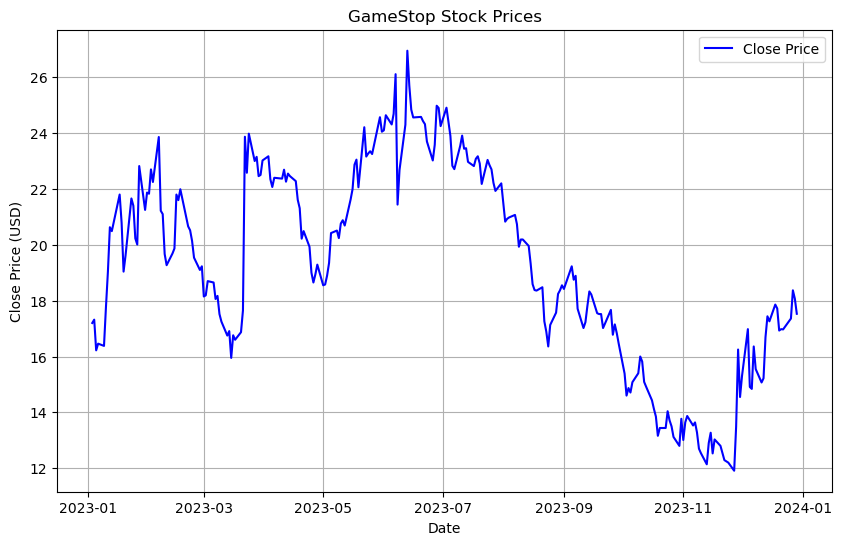

In [51]:
make_graph(gme_data, title="GameStop Stock Prices")